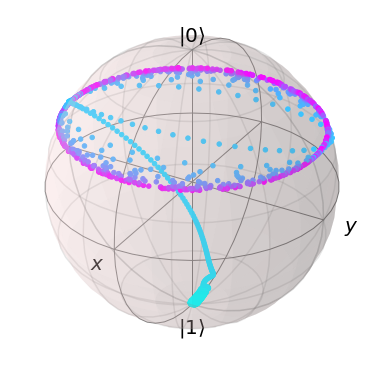

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from qutip import *
from qutip.ipynbtools import version_table
%matplotlib inline


delta = 0.5 * 2 * np.pi
v = 2.0 * 2 * np.pi # sweep rate

H0 = delta/2.0 * sigmax()
H1 = v/2.0 * sigmaz()
H = [H0, [H1, 't']]
psi0 = basis(2,0)

sm = destroy(2)
sx=sigmax();
sy=sigmay()
sz=sigmaz()
expt_ops = [sm.dag() * sm,sx,sy,sz]


tlist = np.linspace(-10.0, 10.0, 1500)
expt_list = sesolve(H, psi0, tlist, expt_ops).expect

b = Bloch()
## normalize colors to times in tlist ##
nrm = mpl.colors.Normalize(-2,10)
colors = cm.cool(nrm(tlist))

## add data points from expectation values ##
b.add_points([expt_list[1],
              expt_list[2],
              -expt_list[3]],'m')

## customize sphere properties ##
b.point_color = list(colors)
b.point_marker = ['o']
b.point_size = [20]

b.zlpos = [1.1,-1.2]

b.show()
